In [47]:
# hullWhite_simulation.py

# Import necessary libraries
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



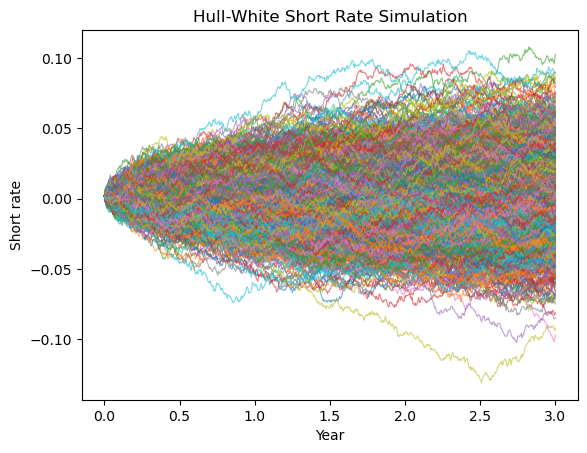

In [49]:
# Hull-White model parameters
volatility = 0.02
mean_reversion_speed = 0.05

# Simulation parameters
simulation_length_in_years = 3
simulation_steps_per_year = 252
total_simulation_steps = simulation_length_in_years * simulation_steps_per_year

# Forward rate
given_forward_rate = 0.0021

# Day Count convention
day_count = ql.Thirty360(ql.Thirty360.USA)

# Evaluation date
evaluation_date = ql.Date(9, 5, 2022)
ql.Settings.instance().evaluationDate = evaluation_date

# Forward rate curve
forward_rate_quote = ql.QuoteHandle(ql.SimpleQuote(given_forward_rate))
forward_rate_curve = ql.FlatForward(evaluation_date, forward_rate_quote, day_count)
yield_curve_handle = ql.YieldTermStructureHandle(forward_rate_curve)

# Hull-White process initialization
hull_white_process = ql.HullWhiteProcess(yield_curve_handle, mean_reversion_speed, volatility)

# Random number generation
uniform_random_generator = ql.UniformRandomGenerator()
uniform_random_sequence = ql.UniformRandomSequenceGenerator(total_simulation_steps, uniform_random_generator)
gaussian_random_sequence = ql.GaussianRandomSequenceGenerator(uniform_random_sequence)

# Path generation
path_generator = ql.GaussianPathGenerator(hull_white_process, simulation_length_in_years, total_simulation_steps, gaussian_random_sequence, False)

# Function to generate the paths
def generate_simulation_paths(number_of_simulations):
    simulation_paths = np.zeros((number_of_simulations, total_simulation_steps + 1))
    for i in range(number_of_simulations):
        sample_path = path_generator.next().value()
        simulation_paths[i, :] = np.array([sample_path[j] for j in range(len(sample_path))])
    return np.array([sample_path.time(j) for j in range(len(sample_path))]), simulation_paths

# Number of simulations
number_of_simulations = 1000

# Generate paths
time_points, simulation_paths = generate_simulation_paths(number_of_simulations)

# Convert paths to a DataFrame
simulation_rates = pd.DataFrame(simulation_paths).T

# Plot each path
for i in range(number_of_simulations):
    plt.plot(time_points, simulation_paths[i, :], lw=0.8, alpha=0.6)

# Set plot labels and title
plt.title("Hull-White Short Rate Simulation")
plt.xlabel('Year')
plt.ylabel('Short rate')

# Save the plot
plt.savefig("image/Hull_White_simulation.pdf")
plt.show()


